In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA


In [4]:
digits=load_digits()
df=pd.DataFrame(digits.data)
df['Target']=digits.target
print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  Target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


In [6]:
kmeans=KMeans(n_clusters=10,random_state=42)
kmeans.fit(digits.data)
df['Cluster']=kmeans.labels_
print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   56   57   58  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  6.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  7.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     59    60    61   62   63  Target  Cluster  
0  13.0  10.0   0.0  0.0  0.0       0        5  
1  11.0  16.0  10.0  0.0  0.0       1        7  
2   3.0  11.0  16.0  9.0  0.0       2        7  
3  13.0  13.0   9.0  0.0  0.0       3        6  
4   2.0  16.0   4.0  0.0  0.0       4        4  

[5 rows x 66 columns]


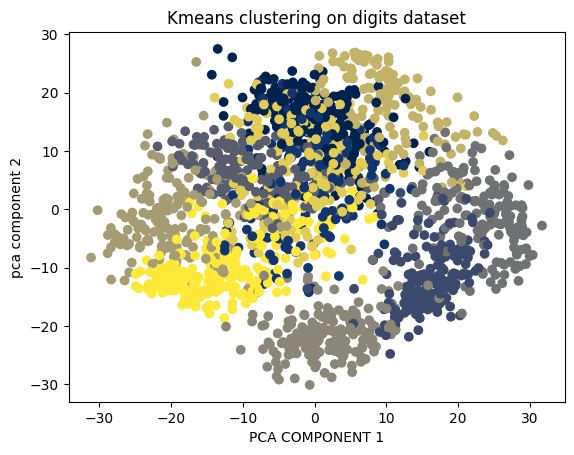

In [10]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(digits.data)
plt.scatter(pca_result[:,0],pca_result[:,1],c=df['Cluster'],cmap='cividis')
plt.xlabel('PCA COMPONENT 1')
plt.ylabel('pca component 2')
plt.title('Kmeans clustering on digits dataset')
plt.show()

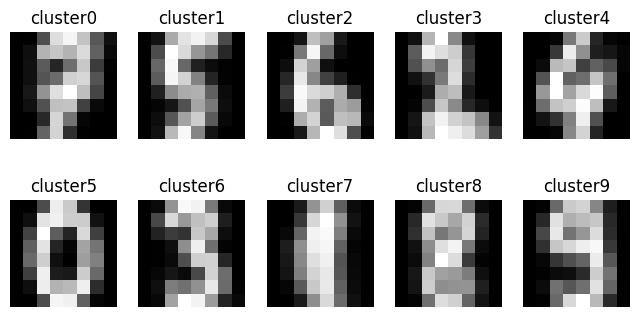

In [23]:
cluster_centers=kmeans.cluster_centers_.reshape(10,8,8)

fig,axes=plt.subplots(2,5,figsize=(8,4))

for i,ax in enumerate(axes.flat):
  ax.imshow(cluster_centers[i],cmap='grey')
  ax.set_title(f'cluster{i}')
  ax.axis('off')
plt.show()